In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
data = pd.read_csv("earthquakes.csv")
data.fillna(data.mean(), inplace=True)
data['is_significant'] = data['mag'] >= 5.0
features = ['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst']
X = data[features]
y = data['is_significant']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
algorithms = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("SVM", SVC()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("Neural Network", MLPClassifier(max_iter=1000)),
    ("AdaBoost", AdaBoostClassifier()),
    ("Bagging", BaggingClassifier())
]
for name, model in algorithms:
    print(f"Algorithm: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)
    print("\n")


/var/folders/lq/st04bkz14jj9j314j3l2lyk80000gp/T/ipykernel_4236/3553266210.py:16: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)
/Users/GGS/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Algorithm: Logistic Regression
Accuracy: 0.8637814827953175
Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.96      0.92      2180
        True       0.78      0.55      0.65       639

    accuracy                           0.86      2819
   macro avg       0.83      0.75      0.78      2819
weighted avg       0.86      0.86      0.85      2819



Algorithm: Decision Tree
Accuracy: 0.8456899609790706
Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.90      0.90      2180
        True       0.66      0.66      0.66       639

    accuracy                           0.85      2819
   macro avg       0.78      0.78      0.78      2819
weighted avg       0.85      0.85      0.85      2819



Algorithm: Random Forest
Accuracy: 0.8978361120964882
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.96      0.94    

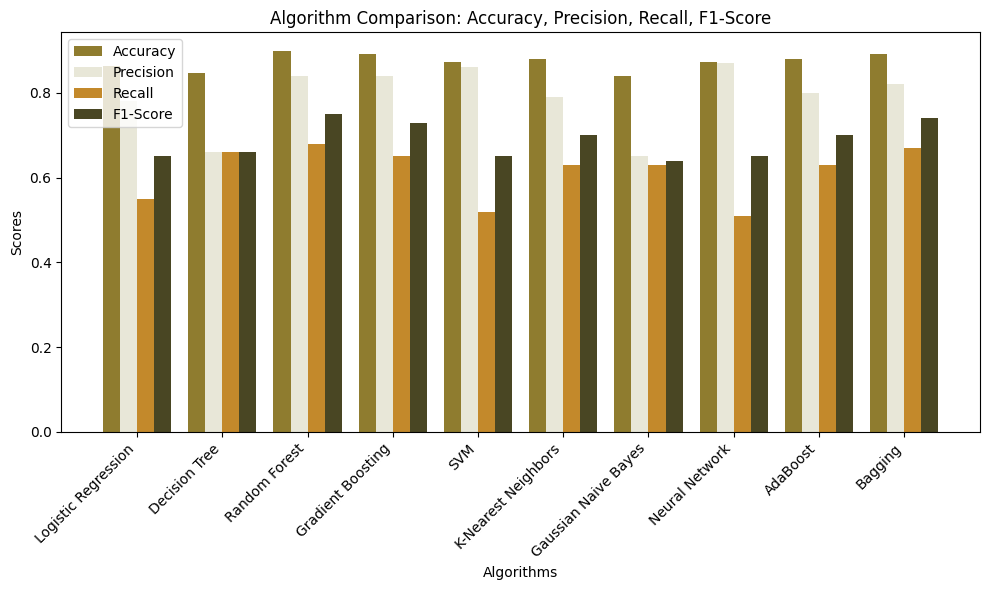

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
algorithms = ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "SVM", "K-Nearest Neighbors", "Gaussian Naive Bayes", "Neural Network", "AdaBoost", "Bagging"]
accuracy = [0.864, 0.846, 0.898, 0.891, 0.872, 0.879, 0.839, 0.873, 0.880, 0.891]
precision = [0.78, 0.66, 0.84, 0.84, 0.86, 0.79, 0.65, 0.87, 0.80, 0.82]
recall = [0.55, 0.66, 0.68, 0.65, 0.52, 0.63, 0.63, 0.51, 0.63, 0.67]
f1_score = [0.65, 0.66, 0.75, 0.73, 0.65, 0.70, 0.64, 0.65, 0.70, 0.74]
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
bar_positions = np.arange(len(algorithms))
ax.bar(bar_positions - 1.5 * bar_width, accuracy, bar_width, label='Accuracy', color='#8f7c2f')
ax.bar(bar_positions - 0.5 * bar_width, precision, bar_width, label='Precision', color='#e8e7d8')
ax.bar(bar_positions + 0.5 * bar_width, recall, bar_width, label='Recall', color='#c3892b')
ax.bar(bar_positions + 1.5 * bar_width, f1_score, bar_width, label='F1-Score', color='#494623')
ax.set_xlabel('Algorithms')
ax.set_ylabel('Scores')
ax.set_title('Algorithm Comparison: Accuracy, Precision, Recall, F1-Score')
ax.set_xticks(bar_positions)
ax.set_xticklabels(algorithms, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()